# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Harits Shofwan Adani
- **Email:** mharits.beyourself@gmail.com
- **ID Dicoding:** mharits

## Menentukan Pertanyaan Bisnis

- Apakah ada tren peningkatan atau penurunan dalam jumlah total penyewaan sepeda dari tahun 2011 hingga 2012?

- Apakah suhu mempengaruhi penggunaan sepeda pada tiap kuartal?


## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap ini yaitu menggunakan dataset yang disediakan oleh Kaggle yaitu "Bike Sharing Dataset" yang memiliki 2 data yaitu day.csv dan hour.csv.

#### Day

Memuat tabel Day dan menampilkan 5 baris pertama

In [38]:
day_df = pd.read_csv("data/day.csv")
day_df.head()
# day_df.count()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Hour

Memuat tabel Hour dan menampilkan 5 baris pertama

In [39]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()
# hour_df.count()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day_df

Mengecek informasi tiap kolom yang ada di day_df.

In [40]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Melihat ringkasan parameter statistik day_df.

In [41]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Mengecek value tiap kolom day_df.

In [42]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengecek jumlah nilai unik di tiap kolom pada day_df.

In [43]:
day_df.apply(lambda x: len(x.unique()))

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

#### Menilai Data hour_df

Mengecek informasi tiap kolom yang ada di day_df.

In [44]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Melihat ringkasan parameter statistik day_df.

In [45]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Mengecek value tiap kolom day_df.

In [46]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengecek jumlah nilai unik di tiap kolom pada day_df.

In [47]:
hour_df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

#### Duplikasi Data

Memastikan tidak ada data duplikasi data pada tiap df.

In [48]:
print("Jumlah duplikasi Daily: ", day_df.duplicated().sum())
print("Jumlah duplikasi Hourly: ", hour_df.duplicated().sum())

Jumlah duplikasi Daily:  0
Jumlah duplikasi Hourly:  0


### Cleaning Data

Mengubah datatype "dteday" dari object menjadi datetime.

In [49]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

Setelah mengubah tipedata colom "dteday", maka selanjutnya yaitu kita mengecek lagi informasinya.

In [50]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [51]:
output_path = 'dashboard/main.csv'
day_df.to_csv(output_path, index=False)

In [52]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [53]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [54]:
print("Jumlah baris pada DataFrame day:", day_df.shape[0])
print("Jumlah baris pada DataFrame hour:", hour_df.shape[0])

Jumlah baris pada DataFrame day: 731
Jumlah baris pada DataFrame hour: 17379


## Exploratory Data Analysis (EDA)

### Menghitung Jumlah Penggunaan Sepeda/Tahun

Untuk menghitung jumlah penggunaan rental sepeda pertahunnya, maka menggunakan ``sum()`` dengan parameter cnt(jumlah sepeda) yang ada di tahun tersebut.

In [55]:
total_by_yr = day_df.groupby(day_df['dteday'].dt.year)['cnt'].sum().reset_index()

total_by_yr.columns = ['Year', 'Total_Count']

total_by_yr

,Year,Total_Count
0,2011,1243103
1,2012,2049576


### Menghitung Jumlah Penggunaan Sepeda/Bulan dan Sepeda/Kuartal

Hal ini dilakukan untuk mengetahui pola penggunaan rental sepeda terjadi peningkatan/penurunan pada kuartal keberapa.

In [56]:
monthly = day_df[((day_df['yr'] == 0) & (day_df['mnth'] <= 12)) | ((day_df['yr'] == 1) & (day_df['mnth'] <= 12))]

unique_years = monthly['dteday'].dt.year.unique()
year_mapping = dict(zip([0, 1], unique_years))
monthly['yr'] = monthly['yr'].map(year_mapping)

pivot_rentals = monthly.pivot_table(index=['yr'], columns='mnth', values='cnt', aggfunc='sum').reset_index()

pivot_rentals.columns = ['Year'] + ['Month ' + str(month) for month in range(1, 13)]

pivot_rentals

,Year,Month 1,Month 2,Month 3,Month 4,Month 5,Month 6,Month 7,Month 8,Month 9,Month 10,Month 11,Month 12
0,2011,38189,48215,64045,94870,135821,143512,141341,136691,127418,123511,102167,87323
1,2012,96744,103137,164875,174224,195865,202830,203607,214503,218573,198841,152664,123713


Setelah menghitung dalam bentuk bulan, maka dibagi menjadi tiap Kuartal, terdapat 4 Kuartal selama 1 tahun.

In [57]:
monthly['quarter'] = pd.cut(monthly['mnth'], bins=[0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'])

pivot_rents = monthly.pivot_table(index=['yr'], columns='quarter', values='cnt', aggfunc='sum').reset_index()

pivot_rents.columns = ['Year', 'Q1 count', 'Q2 count', 'Q3 count', 'Q4 count']

pivot_rents

,Year,Q1 count,Q2 count,Q3 count,Q4 count
0,2011,150449,374203,405450,313001
1,2012,364756,572919,636683,475218


### Menghitung Rata-Rata Suhu/Kuartal (°C)

Langkah selanjutnya yaitu mengubah suhu menjadi nilai aslinya berdasarkan informasi yang telah disediakan oleh dataset tersebut. Caranya yaitu dengan mengalikan nilai maksimum yang telah diberikan.

In [58]:
max_temp = 41
max_atemp = 50

monthly['original_temp'] = day_df['temp'] * max_temp
monthly['original_atemp'] = day_df['atemp'] * max_atemp

print(monthly[['original_temp', 'original_atemp']])

     original_temp  original_atemp
0        14.110847        18.18125
1        14.902598        17.68695
2         8.050924         9.47025
3         8.200000        10.60610
4         9.305237        11.46350
..             ...             ...
726      10.420847        11.33210
727      10.386653        12.75230
728      10.386653        12.12000
729      10.489153        11.58500
730       8.849153        11.17435

[731 rows x 2 columns]


Setelah didapatkan nilai suhu harian, maka nilai tersebut kemudian dirata-rata menggunakan fungsi aggregasi "mean". Setelah itu didapatkan nilai suhu rata-rata di tiap kuartal. Hasil dibawah menyediakan rata-rata suhu lingkungan dan suhu permukaan pada tiap kuartal sepanjang tahun 2011 sampai 2012.

In [59]:
pivot_temp = monthly.pivot_table(index=['yr'], columns='quarter', values='original_temp', aggfunc='mean').reset_index()

pivot_temp.columns = ['Year', 'Q1 temp', 'Q2 temp', 'Q3 temp', 'Q4 temp']

pivot_temp.round(2)

,Year,Q1 temp,Q2 temp,Q3 temp,Q4 temp
0,2011,11.08,23.80,28.42,16.36
1,2012,14.24,24.01,28.52,15.86


In [60]:
pivot_atemp = monthly.pivot_table(index=['yr'], columns='quarter', values='original_atemp', aggfunc='mean').reset_index()

pivot_atemp.columns = ['Year', 'Q1 temp', 'Q2 temp', 'Q3 temp', 'Q4 temp']

pivot_atemp.round(2)

,Year,Q1 temp,Q2 temp,Q3 temp,Q4 temp
0,2011,13.55,27.57,32.29,19.80
1,2012,17.17,27.81,32.28,19.07


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Apakah ada tren peningkatan atau penurunan dalam jumlah total penyewaan sepeda dari tahun 2011 hingga 2012?

Bar Chart dibawah ini yaitu menampilkan jumlah penggunaan sepeda selama setahun, yaitu pada tahun 2011 dan 2012. Hasil menampilkan bahwa jumlah penggunaan sepeda **tahun 2012 lebih tinggi daripada tahun 2011**.

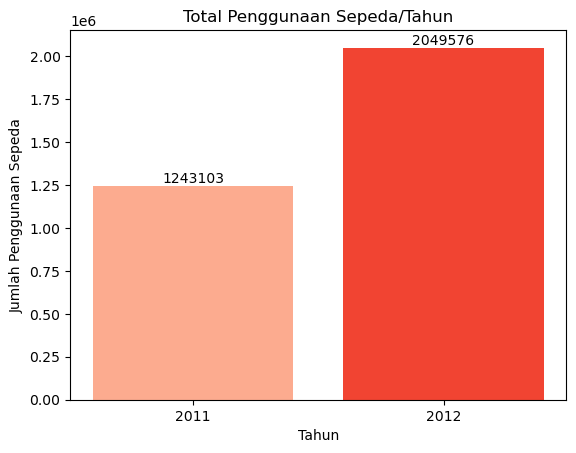

In [61]:
bars = plt.bar(total_by_yr['Year'], total_by_yr['Total_Count'], color=plt.cm.Reds(np.linspace(0.3,0.6, len(total_by_yr))))
plt.xticks(total_by_yr['Year'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Tahun')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.title('Total Penggunaan Sepeda/Tahun')

plt.show()

### Pertanyaan 2:

- Apakah suhu mempengaruhi penggunaan rental sepeda pada tiap kuartal?

Bar Chart dibawah menampilkan jumlah penggunaan rental sepeda tiap kuartal dari tahun 2011 sampai 2012. Pada tahun 2011, jumlah tertinggi ada pada kuartal 3 dengan jumlah 405.450 pengguna, dan pada tahun 2012 juga ada pada kuartal 3 dengan jumlah 636.683 pengguna.

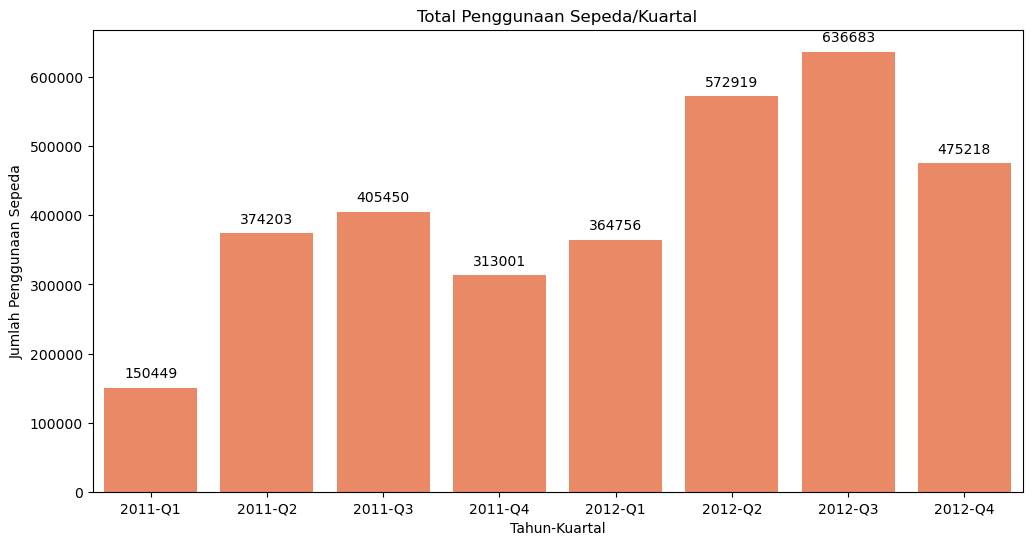

In [62]:
monthly['quarter_year'] = monthly['yr'].astype(str) + "-" + monthly['quarter'].astype(str)

plot_data = monthly.groupby('quarter_year')['cnt'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='quarter_year', y='cnt', data=plot_data, color='coral')
plt.title('Total Penggunaan Sepeda/Kuartal')
plt.xlabel('Tahun-Kuartal')
plt.ylabel('Jumlah Penggunaan Sepeda')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Setelah didapatkan nilai tersebut, statistik diubah dalam bentuk lineplot agar bisa dilihat korelasi antara jumlah penggunaan rental sepeda dengan rata-rata suhu pada tiap kuartal. 

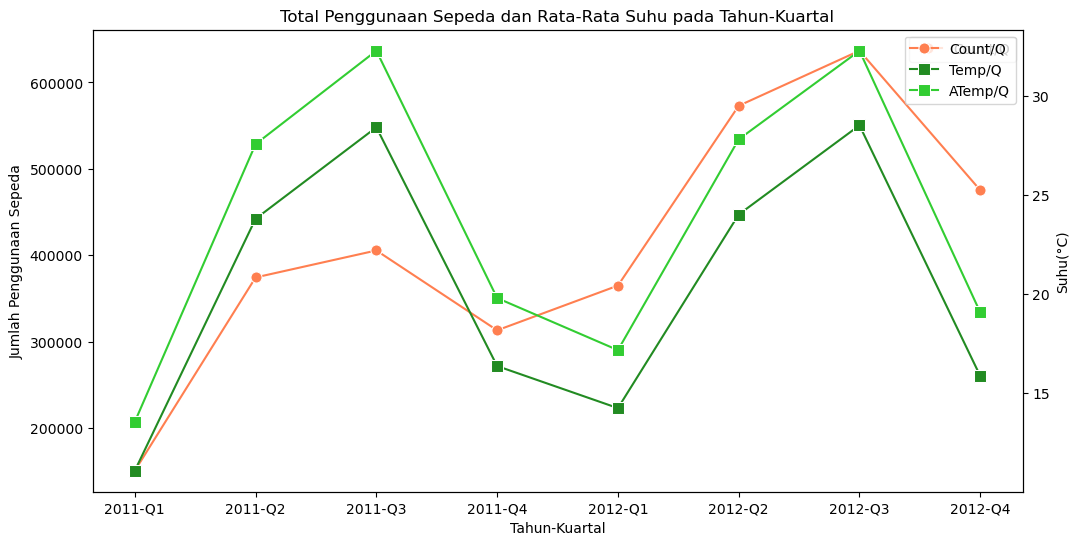

In [64]:
temp_data = monthly.groupby('quarter_year')['original_temp'].mean().reset_index()
atemp_data = monthly.groupby('quarter_year')['original_atemp'].mean().reset_index()

# Bike count plot
plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(x='quarter_year', y='cnt', data=plot_data, marker='o', color='coral', markersize=8, label = 'Count/Q')
plt.title('Total Penggunaan Sepeda dan Rata-Rata Suhu pada Tahun-Kuartal')
plt.xlabel('Tahun-Kuartal')
plt.ylabel('Jumlah Penggunaan Sepeda')

# Temperature plot on the right y-axis
ax2 = ax1.twinx()
sns.lineplot(x='quarter_year', y='original_temp', data=temp_data, marker='s', color='forestgreen', markersize=8, ax=ax2, label = 'Temp/Q')
sns.lineplot(x='quarter_year', y='original_atemp', data=atemp_data, marker='s', color='limegreen', markersize=8, ax=ax2, label = 'ATemp/Q')
ax2.set_ylabel('Suhu(°C)')

# Legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

Hasil di atas menarik dicermati karena terdapat relevansi antara perubahan suhu rata-rata tiap kuartal dan jumlah penggunaan rental sepeda.

## Conclusion

### Kesimpulan Pertanyaan 1:

Berdasarkan hasil analisis, **tahun 2012 mengalami tren peningkatan** penggunaan rental sepeda dengan total berjumlah 2.049.576. **Jumlah ini lebih tinggi dari tahun sebelumnya yaitu 2011** yang memiliki total berjumlah 1.243.103.

### Kesimpulan Pertanyaan 2:

Berdasarkan Bar Chart, **puncak penggunaan rental sepeda di tahun 2011 dan 2012 yaitu di Kuartal 3(Q3)**. Kemudian **diperkuat oleh statisik relevansi antara jumlah penggunaan sepeda terhadap perubahan suhu lingkungan dan suhu permukaan**. Hal ini menunjukkan adanya relevansi antara penggunaan total penggunaan sepeda dan rata-rata suhu pada kuartal tersebut. Hal ini dapat dikarenakan **penggunaan rental sepeda diminati saat suhu lebih hangat dibandingkan suhu yang cenderung dingin**.